# Lab 3 - Neural Networks - Classification

Read about the Dataset - Breast Cancer:
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

### [Optional] if not installed

Install Tensorflow and Keras using the Anaconda Navigator prompt (base root)
- conda install -c conda-forge tensorflow
- conda install -c conda-forge keras

https://anaconda.org/conda-forge/tensorflow

https://anaconda.org/conda-forge/keras


### Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline


Load Dataset

Hints: 
- from sklearn import datasets
- datasets.load_breast_cancer(return_X_y=True)


In [8]:
from sklearn import datasets
x, y = datasets.load_breast_cancer(return_X_y=True)

Print the shape of X and y

In [11]:
print(x.shape)
print(y.shape)

(569, 30)
(569,)


### Divide the dataset 
use "train_test_split()" with test size 30%

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(398, 30)
(398,)
(171, 30)
(171,)


### Neural Network Model

Import Sequential and Dense from Keras

In [18]:
from keras.models import Sequential
from keras.layers import Dense

Create a Sequential model with 1 hidden layer.
- input layer
- hidden layer with 30 neurons - activation RELU
- output layer with 1 neuron - activation sigmoid

In [22]:
model = Sequential()
model.add(Dense(30, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Compile the model
- optimizer - adam
- loss - binary_crossentropy
- metrics - accuracy

In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Print Model summary

In [24]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 961 (3.75 KB)

 Trainable params: 961 (3.75 KB)

 Non-trainable params: 0 (0.00 B)

Train the model
- 100 epochs
- batch_size = 50

save the trining process in "history" variable

In [25]:
history = model.fit(x_train, y_train, epochs=100, batch_size=50, validation_data=(x_test, y_test))

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3940 - loss: 167.6631 - val_accuracy: 0.3333 - val_loss: 166.6911
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4032 - loss: 144.6342 - val_accuracy: 0.3333 - val_loss: 136.2423
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3793 - loss: 119.5063 - val_accuracy: 0.3333 - val_loss: 104.3338
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3690 - loss: 90.8732 - val_accuracy: 0.3333 - val_loss: 72.0461
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3783 - loss: 60.3841 - val_accuracy: 0.3333 - val_loss: 39.5816
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3825 - loss: 29.3886 - val_accuracy: 0.4678 - val_loss: 7.8673
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6871 - loss: 3.9191 - val_accuracy: 0.7310 - val_loss: 4.9929
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6699 - loss: 6.2778 - val_accuracy: 0.8772 -

### Plot the accuracy in a graph along the 50 epochs

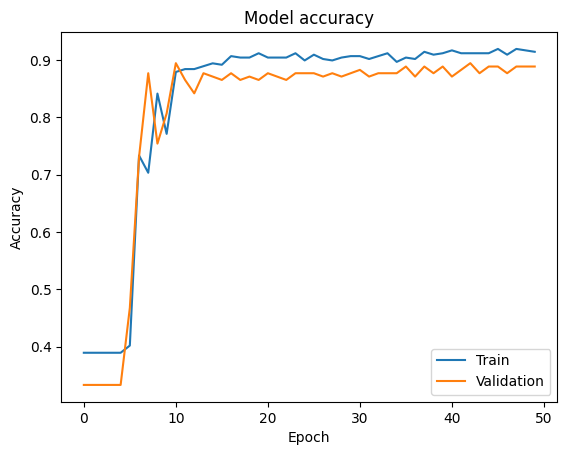

In [30]:
epochs = range(50)
plt.plot(epochs, history.history['accuracy'][:50])
plt.plot(epochs, history.history['val_accuracy'][:50])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

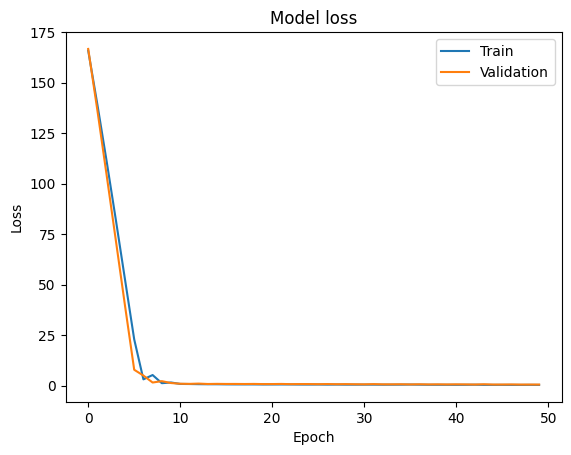

In [32]:
# Plot training
epochs = range(50)
plt.plot(epochs, history.history['loss'][:50])
plt.plot(epochs, history.history['val_loss'][:50])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### Model Evaluation
The predictions are in the range between 0 and 1. By default if the value is >0.5  then it is class 1, otherwise it is class 0

In [34]:
pred_test= model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [35]:
pred_test[:5]

array([[9.9925208e-01],
       [2.1403347e-14],
       [1.1620877e-13],
       [9.9984741e-01],
       [5.6506032e-01]], dtype=float32)

With these code here, we are converting them to 0 or 1

In [36]:
predictions = (pred_test > 0.5).astype(int)
predictions[:5]

array([[1],
       [0],
       [0],
       [1],
       [1]])

This code gets the "loss" and the "accuracy" on the test set

In [39]:
# evaluate the keras model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print (accuracy)

0.9181286692619324


### Callbacks
Define 2 callbacks:
- EarlyStopping(monitor='loss', mode='min', verbose=1, patience=5)
- ModelCheckpoint('best_model2.h5', monitor='loss', verbose=1, save_best_only=True)

and train the model for 100 epochs

In [42]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=5)
model_checkpoint = ModelCheckpoint('best_model2.h5.keras', monitor='loss', verbose=1, save_best_only=True)

history = model.fit(x_train, y_train, epochs=100, batch_size=50, validation_data=(x_test, y_test), callbacks=[early_stopping, model_checkpoint])

Epoch 1/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8800 - loss: 0.3075
Epoch 1: loss improved from inf to 0.21543, saving model to best_model2.h5.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9136 - loss: 0.2514 - val_accuracy: 0.9181 - val_loss: 0.2878
Epoch 2/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9600 - loss: 0.1017
Epoch 2: loss did not improve from 0.21543
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9176 - loss: 0.2835 - val_accuracy: 0.9006 - val_loss: 0.4012
Epoch 3/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9600 - loss: 0.0897
Epoch 3: loss improved from 0.21543 to 0.20568, saving model to best_model2.h5.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9350 - loss: 0.1889 - val_accuracy: 0.9298 - val_loss: 0.2652
Epoch 4/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9600 - loss: 0.0901
Epoch 4: loss did not improve from 0.20568
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9454 - loss: 0.1584 -

Load the saved model and evalaute it on the test data and print accuracy

In [44]:
from keras.models import load_model

# Load the saved model
saved_model = load_model('best_model2.h5.keras')

# Evaluate the model on the test data
loss, accuracy = saved_model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.9298245906829834
